<a href="https://colab.research.google.com/github/Trading-com-Dados/codigos_videos/blob/main/Fundos_Imobili%C3%A1rios_Parte_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300">

---
# **Análise de Fundos de Investimento Imobiliário (FIIs) com Python**
---

# **1. Bibliotecas utilizadas**

In [ ]:
# Algumas das bibliotecas fundamentais nas técnicas de Webscraping
# Bibliotecas opcionais e menos representativas (por ex., seaborn para colorir dataframe) estarão dispostas ao longo do código
# A instalação é necessária apenas na primeira vez de uso

!pip install requests
!pip install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

# **2. Webscraping para Rendimentos de Fundos Imobiliários (FIIs)**

---
Como o foco dessa live é a **análise de Fundos Imobiliários**, vamos acelerar a parte de webscraping dos dados. Se for do interesse do público, podemos programar uma próxima live explorando apenas a mineração de dados na web

---


https://www.fundsexplorer.com.br/ranking

In [ ]:
FII_url = requests.get("https://www.fundsexplorer.com.br/ranking")
FII_url

<Response [200]>

In [ ]:
FII_url.text

'<!DOCTYPE html>\n<html lang="pt-br">\n\n<head>\n<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":0,"applicationTime":14,"agent":""}</script>\n<script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(a

In [ ]:
FII_bs4 = BeautifulSoup(FII_url.text, "html.parser")
FII_bs4.head()

[<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"7ae9c6eb2d","applicationID":"1576126089","transactionName":"IAkLQhFbWVUBQhdKVwcDFl8EWhpLBV5TUVwESQxYB1FN","queueTime":0,"applicationTime":14,"agent":""}</script>,
 <script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"7ae9c6eb2d",applicationID:"1576126089"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(){}function i(t,e,n,r){return function(){return s.recordSupportability("API/"+e+"/called"),o(t+e,[u.now()].concat(c(arguments)),n?null:this,r),n?void 0:this}}var o=

In [ ]:
FII_table = FII_bs4.findAll(attrs = {'id':'scroll-wrapper'})

In [ ]:
table = FII_table[0].findAll('table')

In [ ]:
type(table)

bs4.element.ResultSet

In [ ]:
FII_df = pd.read_html(str(FII_table[0]))[0]

Aqui temos o diamante bruto, os dados de todos os FIIs disponíveis (número de linhas do dataframe), com todos os seus multiplos parametros (número de colunas df)

In [ ]:
FII_df.columns

Index(['Códigodo fundo', 'Setor', 'Preço Atual', 'Liquidez Diária',
       'Dividendo', 'DividendYield', 'DY (3M)Acumulado', 'DY (6M)Acumulado',
       'DY (12M)Acumulado', 'DY (3M)Média', 'DY (6M)Média', 'DY (12M)Média',
       'DY Ano', 'Variação Preço', 'Rentab.Período', 'Rentab.Acumulada',
       'PatrimônioLíq.', 'VPA', 'P/VPA', 'DYPatrimonial',
       'VariaçãoPatrimonial', 'Rentab. Patr.no Período',
       'Rentab. Patr.Acumulada', 'VacânciaFísica', 'VacânciaFinanceira',
       'QuantidadeAtivos'],
      dtype='object')

In [ ]:
str(list(FII_df['Códigodo fundo'].sort_values()))

"['ABCP11', 'AFHI11', 'AFOF11', 'AIEC11', 'ALMI11', 'ALZR11', 'APTO11', 'ARCT11', 'ARRI11', 'ATSA11', 'BARI11', 'BBFI11B', 'BBFO11', 'BBGO11', 'BBIM11', 'BBPO11', 'BBRC11', 'BCFF11', 'BCIA11', 'BCRI11', 'BICE11', 'BICR11', 'BIME11', 'BLCA11', 'BLCP11', 'BLMC11', 'BLMG11', 'BLMO11', 'BLMR11', 'BMLC11', 'BNFS11', 'BPFF11', 'BPML11', 'BRCO11', 'BRCR11', 'BREV11', 'BRLA11', 'BTAL11', 'BTCR11', 'BTLG11', 'BTRA11', 'BTSG11', 'BTWR11', 'BZLI11', 'CACR11', 'CARE11', 'CBOP11', 'CCRF11', 'CEOC11', 'CJCT11', 'CNES11', 'CORM11', 'CPFF11', 'CPTS11', 'CRFF11', 'CTXT11', 'CVBI11', 'CXAG11', 'CXCE11B', 'CXCI11', 'CXCO11', 'CXRI11', 'CXTL11', 'CYCR11', 'DEVA11', 'DRIT11B', 'DVFF11', 'EDFO11B', 'EDGA11', 'EQIR11', 'ERCR11', 'ERPA11', 'EURO11', 'EVBI11', 'FAED11', 'FAMB11B', 'FATN11', 'FCFL11', 'FEXC11', 'FIGS11', 'FIIB11', 'FIIP11B', 'FISC11', 'FIVN11', 'FLCR11', 'FLMA11', 'FLRP11', 'FMOF11', 'FPAB11', 'FVPQ11', 'GALG11', 'GAME11', 'GCFF11', 'GCRA11', 'GCRI11', 'GESE11B', 'GGRC11', 'GSFI11', 'GTLG11', '

# **3. Organização dos dados extraídos**

**Observação**: existem diversas formas muito mais elegantes de manipulação desses dados, usando estruturas condicionais e de repetição, por exemplo<p>
Entretanto, vamos tentar trazer essa manipulação usando funções e métodos mais simples, mesmo que exijam algumas etapas extras

In [ ]:
# Faremos uma cópia do dataframe para manipulá-lo com mais liberdade e, caso 
# editemos algo, possamos reverter a ediçao sem um novo webscraping

FII_df_backup = FII_df.copy()

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"R$ 2,18",16868.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 65.678.487,99","R$ 6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"R$ 14,70",44041.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 431.076.817,02","R$ 10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"R$ 6,15",394.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 27.305.951,24","R$ 13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"R$ 932,03",21.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ 249.632.973,43","R$ 2.245,37",42.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"R$ 7,45",95.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"R$ -9.546.407,61","R$ -12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
FII_df.dtypes

Códigodo fundo              object
Setor                       object
Preço Atual                 object
Liquidez Diária            float64
Dividendo                   object
DividendYield               object
DY (3M)Acumulado            object
DY (6M)Acumulado            object
DY (12M)Acumulado           object
DY (3M)Média                object
DY (6M)Média                object
DY (12M)Média               object
DY Ano                      object
Variação Preço              object
Rentab.Período              object
Rentab.Acumulada            object
PatrimônioLíq.              object
VPA                         object
P/VPA                      float64
DYPatrimonial               object
VariaçãoPatrimonial         object
Rentab. Patr.no Período     object
Rentab. Patr.Acumulada      object
VacânciaFísica              object
VacânciaFinanceira          object
QuantidadeAtivos             int64
dtype: object

In [ ]:
# Erro esperado, pois a variável não é float
np.max(FII_df['Preço Atual'])

TypeError: ignored

In [ ]:
FII_df['Preço Atual']

0        R$ 2,18
1       R$ 14,70
2        R$ 6,15
3      R$ 932,03
4        R$ 7,45
         ...    
277    R$ 385,00
278     R$ 87,19
279     R$ 76,98
280     R$ 76,12
281    R$ 115,39
Name: Preço Atual, Length: 282, dtype: object

In [ ]:
FII_df.iloc[0]

Códigodo fundo                       FIVN11
Setor                             Shoppings
Preço Atual                         R$ 2,18
Liquidez Diária                     16868.0
Dividendo                           R$ 0,00
DividendYield                         0,00%
DY (3M)Acumulado                      0,00%
DY (6M)Acumulado                      0,00%
DY (12M)Acumulado                     0,00%
DY (3M)Média                          0,00%
DY (6M)Média                          0,00%
DY (12M)Média                         0,00%
DY Ano                                  NaN
Variação Preço                        0,00%
Rentab.Período                        0,00%
Rentab.Acumulada                      0,00%
PatrimônioLíq.             R$ 65.678.487,99
VPA                                 R$ 6,98
P/VPA                                  31.0
DYPatrimonial                           NaN
VariaçãoPatrimonial                     NaN
Rentab. Patr.no Período                 NaN
Rentab. Patr.Acumulada          

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    object 
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    object 
 5   DividendYield            276 non-null    object 
 6   DY (3M)Acumulado         276 non-null    object 
 7   DY (6M)Acumulado         276 non-null    object 
 8   DY (12M)Acumulado        276 non-null    object 
 9   DY (3M)Média             276 non-null    object 
 10  DY (6M)Média             276 non-null    object 
 11  DY (12M)Média            276 non-null    object 
 12  DY Ano                   262 non-null    object 
 13  Variação Preço           276 non-null    object 
 14  Rentab.Período           2

In [ ]:
FII_df = FII_df.replace(to_replace = r'^R\$ ', value = '', regex = True)

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,18",16868.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65.678.487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431.076.817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,15",394.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27.305.951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"932,03",21.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249.632.973,43","2.245,37",42.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,45",95.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9.546.407,61","-12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Outro problema é o separador decimal (atualmente como vírgula). Entretanto, não podemos simplesmente substituir por '.' diretamente pois podem existir valores com '.' como separador de milhar
# Agravante extra: em algumas columas o separador decimal está como ',' e outros como '.'

FII_df['PatrimônioLíq.']

0         65.678.487,99
1        431.076.817,02
2         27.305.951,24
3        249.632.973,43
4         -9.546.407,61
             ...       
277       50.992.934,89
278      195.230.258,40
279      376.309.193,73
280      489.344.835,30
281    2.187.502.617,24
Name: PatrimônioLíq., Length: 282, dtype: object

In [ ]:
FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace('.','')

FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace('.','')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace('.','')
FII_df['VPA'] = FII_df['VPA'].str.replace('.','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-

In [ ]:
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,"2,18",16868.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"65678487,99","6,98",31.0,NaN,NaN,NaN,NaN,"56,00%",NaN,1
1,BZLI11,Títulos e Val. Mob.,"14,70",44041.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"431076817,02","10,70",137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,"6,15",394.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"27305951,24","13,89",44.0,NaN,NaN,NaN,NaN,"0,00%","100,00%",1
3,ALMI11,Lajes Corporativas,"932,03",21.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"249632973,43","2245,37",42.0,NaN,NaN,NaN,NaN,"64,05%",NaN,1
4,PABY11,Híbrido,"7,45",95.0,"0,00","0,00%","0,00%","0,00%","0,00%","0,00%",...,"-9546407,61","-12,59",-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Segunda etapa: substituir as ',' por '.' (separador decimal padrão para executarmos as análises estatísticas exploratórias dos dados)
# Agora também converteremos os dados em float (formato de números decimais)

FII_df['PatrimônioLíq.'] = FII_df['PatrimônioLíq.'].str.replace(',','.')

FII_df['Preço Atual'] = FII_df['Preço Atual'].str.replace(',','.')
FII_df['Dividendo'] = FII_df['Dividendo'].str.replace(',','.')
FII_df['VPA'] = FII_df['VPA'].str.replace(',','.')

In [ ]:
FII_df['PatrimônioLíq.']  = FII_df['PatrimônioLíq.'] .astype(float)
FII_df['Preço Atual']  = FII_df['Preço Atual'] .astype(float)
FII_df['Dividendo']  = FII_df['Dividendo'] .astype(float)
FII_df['VPA']  = FII_df['VPA'] .astype(float)

In [ ]:
FII_df['PatrimônioLíq.']

0      6.567849e+07
1      4.310768e+08
2      2.730595e+07
3      2.496330e+08
4     -9.546408e+06
           ...     
277    5.099293e+07
278    1.952303e+08
279    3.763092e+08
280    4.893448e+08
281    2.187503e+09
Name: PatrimônioLíq., Length: 282, dtype: float64

In [ ]:
np.max(FII_df['Preço Atual'] )

76000.0

In [ ]:
np.min(FII_df['Preço Atual'] )

0.9

In [ ]:
np.min(FII_df['PatrimônioLíq.'] )

-9546407.61

In [ ]:
FII_df.iloc[0:10].transpose()

,0,1,2,3,4,5,6,7,8,9
Códigodo fundo,FIVN11,BZLI11,XTED11,ALMI11,PABY11,ORPD11,FISC11,BNFS11,HSML11,SHPH11
Setor,Shoppings,Títulos e Val. Mob.,Lajes Corporativas,Lajes Corporativas,Híbrido,Títulos e Val. Mob.,Lajes Corporativas,Outros,Shoppings,Shoppings
Preço Atual,2.18,14.7,6.15,932.03,7.45,100.0,165.0,118.12,77.83,795.0
Liquidez Diária,16868.0,44041.0,394.0,21.0,95.0,4.0,200.0,389.0,19306.0,390.0
Dividendo,0.0,0.0,0.0,0.0,0.0,1.38,0.22,1.42,0.6,3.35
DividendYield,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,20%","0,74%","0,41%"
DY (3M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","3,22%","2,27%","1,34%"
DY (6M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","6,37%","4,37%","2,81%"
DY (12M)Acumulado,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","11,76%","7,72%","4,75%"
DY (3M)Média,"0,00%","0,00%","0,00%","0,00%","0,00%",NaN,"0,00%","1,07%","0,76%","0,45%"


In [ ]:
FII_df = FII_df.replace(to_replace = r'%$', value = '', regex = True)
FII_df.head()

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,PatrimônioLíq.,VPA,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos
0,FIVN11,Shoppings,2.18,16868.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,6.567849e+07,6.98,31.0,NaN,NaN,NaN,NaN,"56,00",NaN,1
1,BZLI11,Títulos e Val. Mob.,14.70,44041.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,4.310768e+08,10.70,137.0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,XTED11,Lajes Corporativas,6.15,394.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,2.730595e+07,13.89,44.0,NaN,NaN,NaN,NaN,"0,00","100,00",1
3,ALMI11,Lajes Corporativas,932.03,21.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,2.496330e+08,2245.37,42.0,NaN,NaN,NaN,NaN,"64,05",NaN,1
4,PABY11,Híbrido,7.45,95.0,0.0,"0,00","0,00","0,00","0,00","0,00",...,-9.546408e+06,-12.59,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
set(FII_df.Setor)

{'Hospital',
 'Hotel',
 'Híbrido',
 'Lajes Corporativas',
 'Logística',
 'Outros',
 'Residencial',
 'Shoppings',
 'Títulos e Val. Mob.',
 nan}

In [ ]:
FII_df['DividendYield'] = FII_df['DividendYield'].str.replace(',','.').astype(float)

In [ ]:
FII_df['DY (3M)Acumulado'] = FII_df['DY (3M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (6M)Acumulado'] = FII_df['DY (6M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (12M)Acumulado'] = FII_df['DY (12M)Acumulado'].str.replace(',','.').astype(float)
FII_df['DY (3M)Média'] = FII_df['DY (3M)Média'].str.replace(',','.').astype(float)
FII_df['DY (6M)Média'] = FII_df['DY (6M)Média'].str.replace(',','.').astype(float)
FII_df['DY (12M)Média'] = FII_df['DY (12M)Média'].str.replace(',','.').astype(float)
FII_df['DY Ano'] = FII_df['DY Ano'].str.replace(',','.').astype(float)
FII_df['Variação Preço'] = FII_df['Variação Preço'].str.replace(',','.').astype(float)
FII_df['Rentab.Período'] = FII_df['Rentab.Período'].str.replace(',','.').astype(float)
FII_df['Rentab.Acumulada'] = FII_df['Rentab.Acumulada'].str.replace(',','.').astype(float)
FII_df['DYPatrimonial'] = FII_df['DYPatrimonial'].str.replace(',','.').astype(float)
FII_df['VariaçãoPatrimonial'] = FII_df['VariaçãoPatrimonial'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.no Período'] = FII_df['Rentab. Patr.no Período'].str.replace(',','.').astype(float)
FII_df['Rentab. Patr.Acumulada'] = FII_df['Rentab. Patr.Acumulada'].str.replace(',','.').astype(float)
FII_df['VacânciaFísica'] = FII_df['VacânciaFísica'].str.replace(',','.').astype(float)
FII_df['VacânciaFinanceira'] = FII_df['VacânciaFinanceira'].str.replace(',','.').astype(float)

In [ ]:
np.max(FII_df['DividendYield'])

2.9

In [ ]:
FII_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Códigodo fundo           282 non-null    object 
 1   Setor                    278 non-null    object 
 2   Preço Atual              274 non-null    float64
 3   Liquidez Diária          274 non-null    float64
 4   Dividendo                282 non-null    float64
 5   DividendYield            276 non-null    float64
 6   DY (3M)Acumulado         276 non-null    float64
 7   DY (6M)Acumulado         276 non-null    float64
 8   DY (12M)Acumulado        276 non-null    float64
 9   DY (3M)Média             276 non-null    float64
 10  DY (6M)Média             276 non-null    float64
 11  DY (12M)Média            276 non-null    float64
 12  DY Ano                   262 non-null    float64
 13  Variação Preço           276 non-null    float64
 14  Rentab.Período           2

In [ ]:
 # Contagem de valores NaN de cada variável
# De forma particular, cada analista escolherá se aquela quantidade de NaNs serão ignorados ou não

 FII_df.isna().sum()/len(FII_df)*100

Códigodo fundo              0.000000
Setor                       1.418440
Preço Atual                 2.836879
Liquidez Diária             2.836879
Dividendo                   0.000000
DividendYield               2.127660
DY (3M)Acumulado            2.127660
DY (6M)Acumulado            2.127660
DY (12M)Acumulado           2.127660
DY (3M)Média                2.127660
DY (6M)Média                2.127660
DY (12M)Média               2.127660
DY Ano                      7.092199
Variação Preço              2.127660
Rentab.Período              2.127660
Rentab.Acumulada            2.127660
PatrimônioLíq.              0.000000
VPA                         0.000000
P/VPA                       2.836879
DYPatrimonial              12.411348
VariaçãoPatrimonial        12.411348
Rentab. Patr.no Período    12.411348
Rentab. Patr.Acumulada     12.411348
VacânciaFísica             56.382979
VacânciaFinanceira         89.361702
QuantidadeAtivos            0.000000
dtype: float64

In [ ]:
FII_df.dropna(subset = ['Preço Atual', 'DividendYield', 'Setor'], inplace = True)
FII_df.shape

(264, 26)

##4. Análises estatísticas exploratórias do FIIs

###4.1. Quanto mais caro maior o DY(12m) Acumulado?

In [ ]:
import plotly.express as px

fig = px.scatter(FII_df, x='Preço Atual', y='DY (12M)Acumulado', color='Setor')
fig.show()

In [ ]:
FII_df['log Preço Atual'] = np.log(FII_df['Preço Atual']+1)

fig = px.scatter(FII_df, x='log Preço Atual', y='DY (12M)Acumulado', color ='Setor')
fig.show()

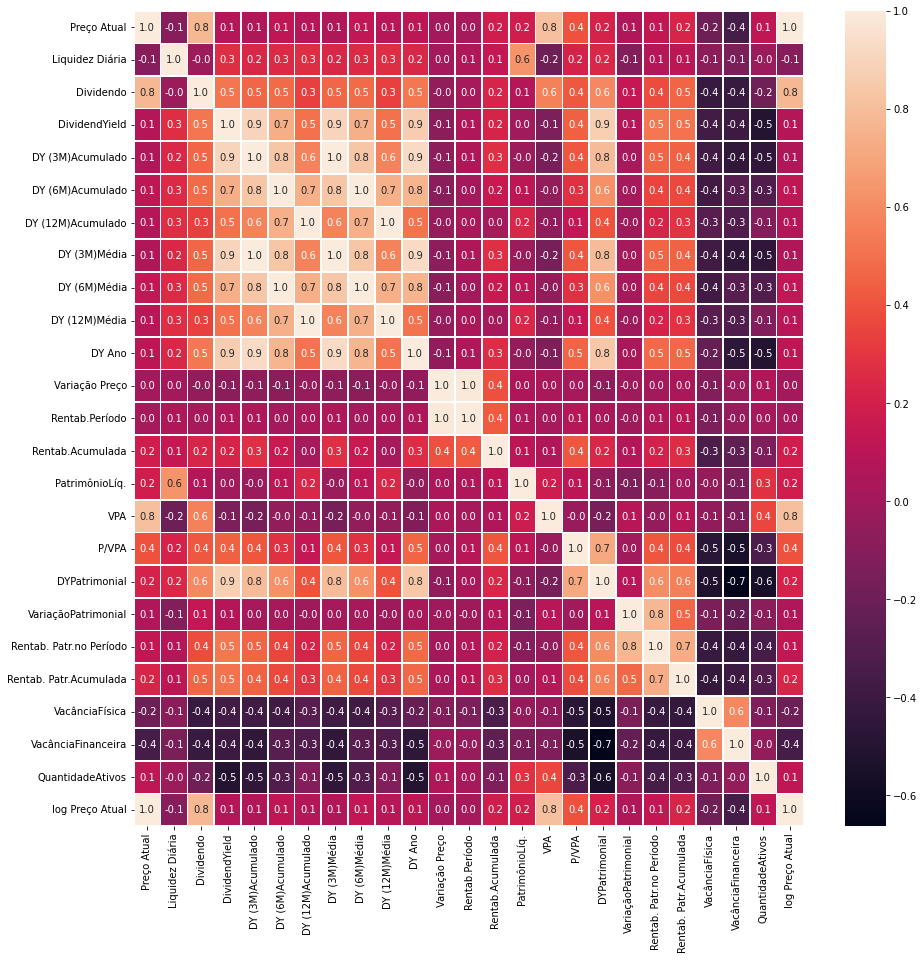

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
corr_matrix = FII_df.corr(method='spearman')

plot = sns.heatmap(corr_matrix, annot= True, fmt='.1f', linewidths=0.7)
plt.rcParams.update({'font.size': 10})

In [ ]:
pivot_table_FIIs = pd.pivot_table(FII_df, values='DY (12M)Acumulado', index=["Setor"], columns=[], aggfunc=('mean', 'median'))
pivot_table_FIIs.sort_values('mean', ascending=False)

,mean,median
Setor,,
Outros,9.391176,9.990
Hospital,8.563333,9.330
Títulos e Val. Mob.,8.520889,10.360
Logística,7.820455,8.115
Híbrido,7.100455,7.960
Lajes Corporativas,6.915897,7.260
Hotel,6.826667,5.410
Shoppings,5.252273,6.790
Residencial,2.394286,0.000


In [ ]:
FII_df['Fundos_VPA'] = FII_df['P/VPA'] < 100
FII_VPA = FII_df[FII_df['Fundos_VPA']==True]
FII_VPA

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
0,FIVN11,Shoppings,2.18,16868.0,0.00,0.00,0.00,0.00,0.00,0.00,...,31.0,NaN,NaN,NaN,NaN,56.00,NaN,1,1.156881,True
2,XTED11,Lajes Corporativas,6.15,394.0,0.00,0.00,0.00,0.00,0.00,0.00,...,44.0,NaN,NaN,NaN,NaN,0.00,100.0,1,1.967112,True
3,ALMI11,Lajes Corporativas,932.03,21.0,0.00,0.00,0.00,0.00,0.00,0.00,...,42.0,NaN,NaN,NaN,NaN,64.05,NaN,1,6.838437,True
4,PABY11,Híbrido,7.45,95.0,0.00,0.00,0.00,0.00,0.00,0.00,...,-59.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2.134166,True
8,HSML11,Shoppings,77.83,19306.0,0.60,0.74,2.27,4.37,7.72,0.76,...,83.0,0.64,-0.06,0.58,1.59,4.50,NaN,5,4.367294,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,RNDP11,Títulos e Val. Mob.,385.00,12.0,4.26,1.12,2.84,4.83,8.38,0.95,...,81.0,0.90,-29.72,-29.09,-27.55,NaN,NaN,0,5.955837,True
278,PLCR11,Híbrido,87.19,1605.0,1.10,1.26,3.63,7.16,12.96,1.21,...,94.0,1.19,-0.09,1.10,4.62,NaN,NaN,0,4.479494,True
279,CXCO11,Lajes Corporativas,76.98,1450.0,0.73,0.94,2.64,5.16,9.31,0.88,...,80.0,0.76,-0.13,0.63,2.53,NaN,NaN,0,4.356452,True
280,PATL11,Híbrido,76.12,17254.0,0.58,0.75,2.27,4.69,9.13,0.76,...,78.0,0.59,-0.06,0.54,2.39,0.00,0.0,4,4.345363,True


In [ ]:
#Dividend Yeld Maior que 10%

FII_VPA_Select = FII_VPA[FII_VPA ['DY (12M)Acumulado'] > 10]
FII_VPA_Select

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,DividendYield,DY (3M)Acumulado,DY (6M)Acumulado,DY (12M)Acumulado,DY (3M)Média,...,P/VPA,DYPatrimonial,VariaçãoPatrimonial,Rentab. Patr.no Período,Rentab. Patr.Acumulada,VacânciaFísica,VacânciaFinanceira,QuantidadeAtivos,log Preço Atual,Fundos_VPA
10,SPTW11,Lajes Corporativas,43.28,2329.0,0.40,0.90,2.71,5.30,16.30,0.90,...,82.0,0.76,0.06,0.81,3.30,0.00,NaN,1,3.790533,True
19,PORD11,Títulos e Val. Mob.,94.00,8282.0,1.41,1.49,3.95,7.54,13.24,1.32,...,95.0,1.42,0.03,1.45,4.92,NaN,NaN,0,4.553877,True
28,RRCI11,Títulos e Val. Mob.,90.61,379.0,1.30,1.41,4.25,7.95,13.62,1.42,...,92.0,1.33,0.38,1.72,5.92,NaN,NaN,0,4.517540,True
29,BBFO11,Títulos e Val. Mob.,72.68,6945.0,0.77,1.05,3.03,5.96,10.31,1.01,...,85.0,0.90,0.28,1.18,2.46,NaN,NaN,0,4.299731,True
31,HBRH11,Híbrido,82.97,185.0,0.71,0.85,2.68,6.11,10.40,0.89,...,73.0,0.63,0.61,1.24,3.22,NaN,NaN,3,4.430460,True
34,AIEC11,Lajes Corporativas,78.99,4273.0,0.72,0.90,3.35,5.84,10.22,1.12,...,78.0,0.71,0.02,0.74,2.64,0.00,NaN,2,4.381902,True
35,HSAF11,Títulos e Val. Mob.,93.99,2159.0,1.15,1.21,3.60,7.00,13.07,1.20,...,99.0,1.21,0.40,1.61,4.24,NaN,NaN,0,4.553772,True
38,RFOF11,Títulos e Val. Mob.,72.00,2376.0,0.67,0.94,2.78,5.43,10.13,0.93,...,85.0,0.79,1.28,2.08,0.24,NaN,NaN,0,4.290459,True
42,MGHT11,Hotel,76.01,69.0,0.80,1.01,2.91,5.67,10.20,0.97,...,77.0,0.81,0.18,0.99,1.81,NaN,NaN,0,4.343935,True
55,ITIP11,Títulos e Val. Mob.,82.75,1305.0,1.02,1.23,3.51,7.11,12.89,1.17,...,95.0,1.17,-0.53,0.63,2.71,NaN,NaN,0,4.427836,True
